**Installing Dependencies**

In [8]:
!pip3 install opencv-python
!pip3 install numpy
!pip3 install matplotlib
!pip3 install opencv-python-headless -q

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


**Importing Dependencies**

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Counter-Coin**
this section is for counting coin

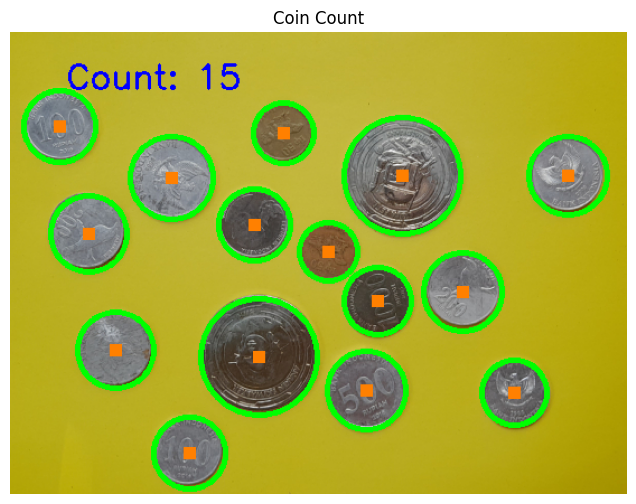

In [5]:
def detect_coins(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply Hough transform to detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=70, param2=40, minRadius=10, maxRadius=100)

    count = 0  # Counter for the number of detected coins

    if circles is not None:
        # Convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # Loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # Draw the circle in the output image
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            # Draw a rectangle around the circle
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
            count += 1  # Increment the counter for each detected coin

    # Display count on the image
    cv2.putText(image, f'Count: {count}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image

    plt.figure(figsize=(8, 6))
    plt.imshow(image_rgb)
    plt.title("Coin Count")
    plt.axis('off')
    plt.show()

# Path to the image
image_path = 'coins-image/coins-yellow (1).jpg'

# Detect coins in the image
detect_coins(image_path)

**Showing Gaussian Blur and Threshold**

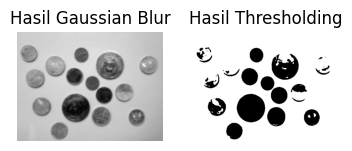

In [7]:
def detect_coins(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)

    # Apply Hough transform to detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=70, param2=40, minRadius=10, maxRadius=100)

    count = 0  # Counter for the number of detected coins

    if circles is not None:
        # Convert the (x, y) coordinates and radius of the circles to integers
        circles = np.round(circles[0, :]).astype("int")

        # Loop over the (x, y) coordinates and radius of the circles
        for (x, y, r) in circles:
            # Draw the circle in the output image
            cv2.circle(image, (x, y), r, (0, 255, 0), 4)
            # Draw a rectangle around the circle
            cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
            count += 1  # Increment the counter for each detected coin

    # Display count on the image
    cv2.putText(image, f'Jumlah: {count}', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Convert BGR image to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the blurred image
    plt.subplot(1, 3, 2)
    plt.imshow(blurred, cmap='gray')
    plt.title("Hasil Gaussian Blur")
    plt.axis('off')

    # Apply thresholding
    _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

    # Display the thresholded image
    plt.subplot(1, 3, 3)
    plt.imshow(thresh, cmap='gray')
    plt.title("Hasil Thresholding")
    plt.axis('off')

    plt.show()

# Path to the image
image_path = 'coins-image/coins-yellow (1).jpg'

# Detect coins in the image and display the results
detect_coins(image_path)